In [14]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [16]:
data = pd.read_csv('../dataset/HR_comma_sep.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [18]:
data.shape

(14999, 10)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [51]:
data["left_label"] = data["left"].map({0:"stayed",1:"left"})
data["promotion_label"] = data["promotion_last_5years"].map({0:"not promoted",1:"promoted"})

In [56]:
salary_left = data.groupby(["salary" ,"promotion_label"])["left_label"].value_counts().sort_index()
print(salary_left)

salary  promotion_label  left_label
high    not promoted     left            82
                         stayed        1083
        promoted         stayed          72
low     not promoted     left          2158
                         stayed        5092
        promoted         left            14
                         stayed          52
medium  not promoted     left          1312
                         stayed        4953
        promoted         left             5
                         stayed         176
Name: count, dtype: int64


Text(0.5, 1.0, 'Employee resignation by salary & promotion')

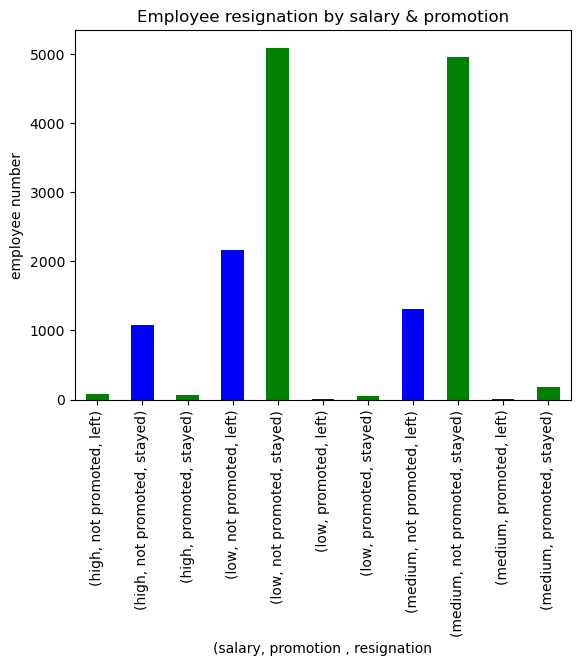

In [63]:
salary_left.plot(kind="bar",stacked=True , color=["green","blue"])
plt.xlabel("(salary, promotion , resignation")
plt.ylabel("employee number")
plt.title("Employee resignation by salary & promotion")

In [82]:
data["average_daily_hours"] = data["average_montly_hours"] / 20
hour_bins = [0,5,10,20]
labels = ["0-5", "5-10", "10-20"]
data["worked_hours_range"] = pd.cut(data["average_daily_hours"], bins=hour_bins, labels=labels, right=True)
hour_worked_left = data.groupby('worked_hours_range',observed=True)["left_label"].value_counts().sort_index()

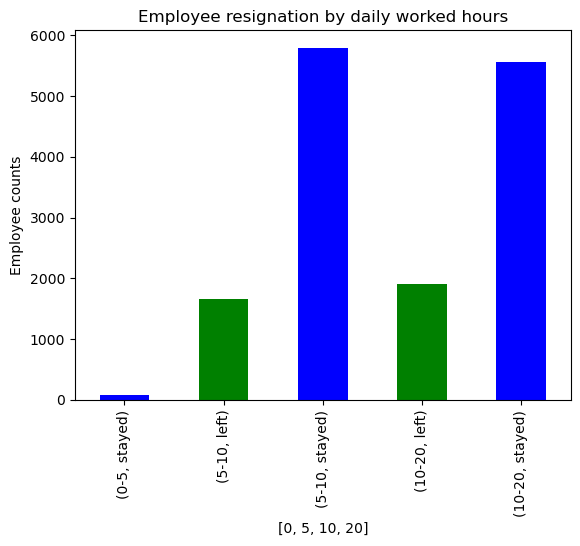

In [85]:
hour_worked_left.plot(
    kind="bar" , 
    color=["blue","green"]) 
plt.xlabel(hour_bins) 
plt.ylabel("Employee counts") 
plt.title("Employee resignation by daily worked hours") 
plt.show()